Nombre del programa: Reducción de dimensionalidad

Descripcion: Este ejercicio tiene como propósito aplicar un modelo de reducción de dimensionalidad (SVD) para transformar y visualizar datos de manera más comprensible, conservando la información más relevante. Para ello, se parte de un conjunto de datos real, el cual se caracteriza, limpia y transforma

Desarrollado por: Juan Jose Gañan

Fecha: 13/05/2025

# Desarrollo del Ejercicio

¿Que es el dataset?

El 20 Newsgroups es un conjunto de datos muy conocido en el ámbito del procesamiento de lenguaje natural y el aprendizaje automático. Es un corpus de texto compuesto por publicaciones extraídas de 20 grupos de noticias (newsgroups) diferentes de Usenet, una red de foros en línea muy popular en los años 90.

Composición del dataset:
Categorías: Contiene datos clasificados en 20 temas o categorías, que pueden ser generales o específicas. Algunas categorías incluyen:

Ciencia, Computación, Temas sociales, Miscelánea

1. Importar librerías necesarias

In [ ]:
# Importamos las librerías básicas que implementaremos
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

2. Cargar el dataset

In [ ]:
# Cargamos el dataset de "20 Newsgroups", que son básicamente textos de correos de distintos temas
# Solo con esto ya tenemos los textos y sus categorías
newsgroups = fetch_20newsgroups(subset='all')
texts = newsgroups.data       # Aquí están los textos
labels = newsgroups.target    # Aquí están las etiquetas numéricas de cada texto

3. Preprocesamiento y vectorización

In [ ]:
# Ahora vamos a transformar estos textos en números usando TF-IDF
# Esto básicamente convierte cada documento en un vector numérico con las palabras más importantes
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limitamos a 5000 términos más comunes
X_tfidf = vectorizer.fit_transform(texts)  # Aplicamos el vectorizador al texto

# Ahora X_tfidf es una matriz gigante (documentos x palabras) donde cada celda tiene el peso TF-IDF

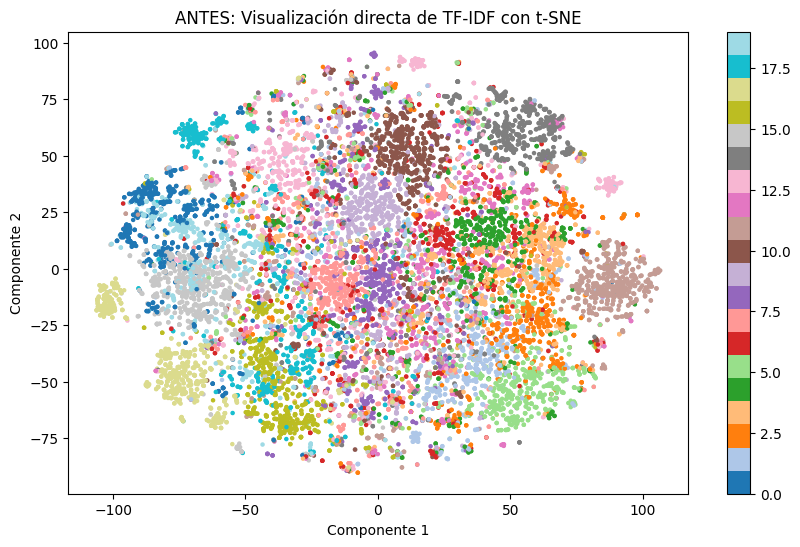

In [ ]:
# Aplicar t-SNE directamente sobre TF-IDF (sin reducción)
tsne_original = TSNE(n_components=2, perplexity=30, init='random', random_state=42)
X_2d_original = tsne_original.fit_transform(X_tfidf.toarray())  # Convertimos la matriz sparse a densa

plt.figure(figsize=(10, 6))
plt.scatter(X_2d_original[:, 0], X_2d_original[:, 1], c=labels, cmap='tab20', s=5)
plt.colorbar()
plt.title("ANTES: Visualización directa de TF-IDF con t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()
# El Antes

4. Aplicar Truncated SVD

In [ ]:
# TruncatedSVD nos permite "comprimir" la información manteniendo los temas más importantes

svd = TruncatedSVD(n_components=100, random_state=42)  # Queremos reducir a 100 dimensiones
X_reduced = svd.fit_transform(X_tfidf)  # Aplicamos SVD sobre la matriz TF-IDF

# Ahora X_reduced tiene menos columnas (100 en lugar de 5000), pero sigue capturando el contenido esencial

5. Visualización con t-SNE

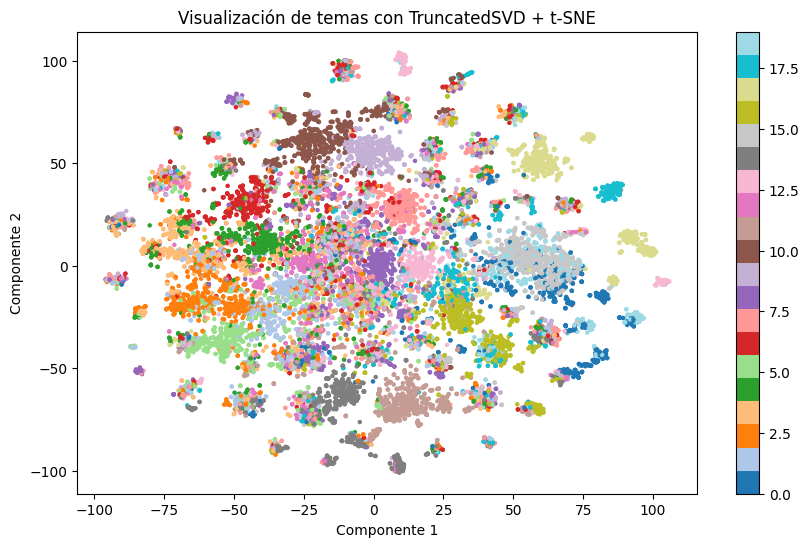

In [ ]:
# Para visualizar los datos reducidos, usamos t-SNE para bajarlos de 100D a 2D (solo para verlos)
# Esto nos permite hacer un gráfico que nos entender si los temas se separan visualmente

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X_reduced)

# Graficamos
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab20', s=5)
plt.colorbar()
plt.title("Visualización de temas con TruncatedSVD + t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()
# El Después

In [ ]:
# Esto es un ensayo
tsne_original = TSNE(n_components=2, perplexity=30, init='random', random_state=42)
X_2d_original = tsne_original.fit_transform(X_tfidf)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_2d_original[:, 0], X_2d_original[:, 1], c=labels, cmap='tab20', s=5)
plt.title("Sin reducción (solo TF-IDF + t-SNE)")

plt.subplot(1, 2, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab20', s=5)
plt.title("Con reducción (SVD + t-SNE)")
plt.show()